In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import geoviews as gv


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


In [3]:
# The URL for the API to index variables in next step
test_url="http://api.openweathermap.org/data/2.5/weather?units=Imperial"
test_query_url=test_url+"&q="+'Hobart'+"&appid="+weather_api_key
test_weather=requests.get(test_query_url).json()
pprint(test_weather)

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -42.8794, 'lon': 147.3294},
 'dt': 1706671138,
 'id': 2163355,
 'main': {'feels_like': 68.05,
          'humidity': 37,
          'pressure': 1012,
          'temp': 69.66,
          'temp_max': 69.66,
          'temp_min': 69.66},
 'name': 'Hobart',
 'sys': {'country': 'AU',
         'id': 9545,
         'sunrise': 1706641809,
         'sunset': 1706693857,
         'type': 1},
 'timezone': 39600,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 130, 'speed': 13.8}}


In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url+"&q="+city+"&appid="+weather_api_key+"&units=metric").json()# YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | codrington


Processing Record 2 of Set 1 | zilair
Processing Record 3 of Set 1 | ola
Processing Record 4 of Set 1 | crane
Processing Record 5 of Set 1 | siwa oasis
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | bayanhongor
Processing Record 9 of Set 1 | sitka
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | hammerfest
Processing Record 12 of Set 1 | lubang
Processing Record 13 of Set 1 | margaret river
Processing Record 14 of Set 1 | arno
Processing Record 15 of Set 1 | touros
Processing Record 16 of Set 1 | saksaul'skiy
City not found. Skipping...
Processing Record 17 of Set 1 | kiunga
Processing Record 18 of Set 1 | acarau
Processing Record 19 of Set 1 | papatowai
Processing Record 20 of Set 1 | ust-nera
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | bethel
Processing Record 23 of Set 1 | ancud
Processing Record 24 of Set 1 | tolanaro
Processing Record 25 of Set

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)  

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,codrington,-38.2667,141.9667,20.06,58,22,6.47,AU,1706671143
1,zilair,52.2332,57.4392,-9.24,95,100,4.21,RU,1706671143
2,ola,59.5833,151.2833,-21.37,82,14,1.99,RU,1706671143
3,crane,31.3974,-102.3501,14.92,38,38,3.37,US,1706671144
4,siwa oasis,29.2041,25.5195,8.88,74,44,4.35,EG,1706671144


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,codrington,-38.2667,141.9667,20.06,58,22,6.47,AU,1706671143
1,zilair,52.2332,57.4392,-9.24,95,100,4.21,RU,1706671143
2,ola,59.5833,151.2833,-21.37,82,14,1.99,RU,1706671143
3,crane,31.3974,-102.3501,14.92,38,38,3.37,US,1706671144
4,siwa oasis,29.2041,25.5195,8.88,74,44,4.35,EG,1706671144


## Latitude vs Temperature

Text(0.5, 1.0, 'City Max Latitude vs. Temperature (2022-10-18)')

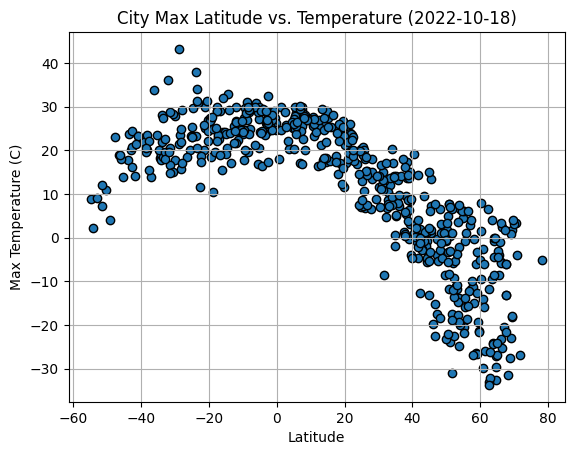

In [9]:
#define your X & Y data
x_data = city_data_df['Lat']
y_data = city_data_df['Max Temp']

#plot the data
lat_vs_temp = plt.scatter(x_data, y_data, edgecolor = 'black')

#labels & grid
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature (2022-10-18)')

## Latitude vs Humidity

Text(0.5, 1.0, 'City Latitude vs. Humidity (2022-10-18)')

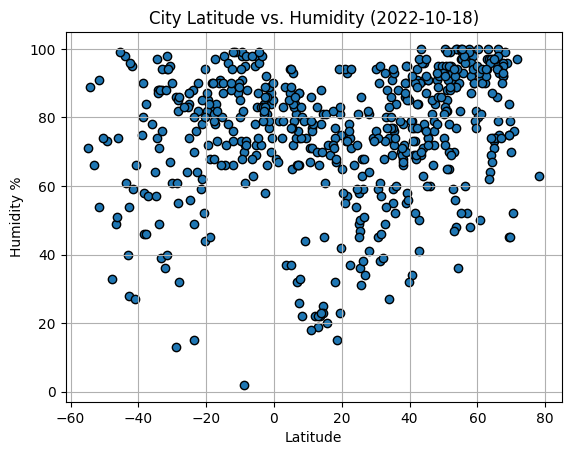

In [10]:
#keep above x_data the same, change y_data to humidity
y_data = city_data_df['Humidity']

#plot the data as before
lat_vs_humid = plt.scatter(x_data, y_data, edgecolor = 'black')

#labels & grid
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('City Latitude vs. Humidity (2022-10-18)')

## Latitude vs Cloudiness


Text(0.5, 1.0, 'City Latitude vs. Cloudiness (2022-10-18)')

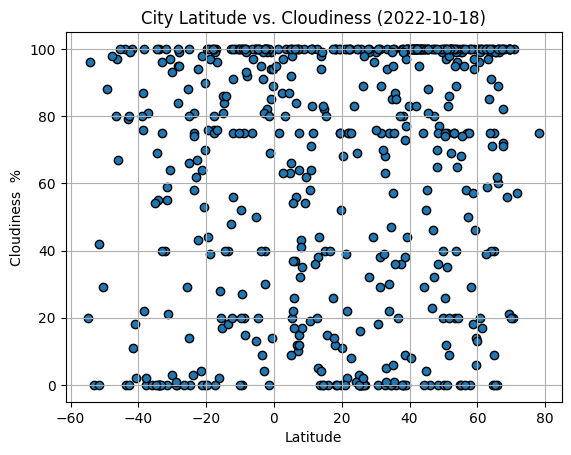

In [11]:
#keep above x_data the same, change y_data to cloudiness
y_data = city_data_df['Cloudiness']

#plot the data as before
lat_vs_humid = plt.scatter(x_data, y_data, edgecolor = 'black')

#labels & grid
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness  %')
plt.title('City Latitude vs. Cloudiness (2022-10-18)')

Text(0.5, 1.0, 'City Latitude vs. Wind Speed (2022-10-18)')

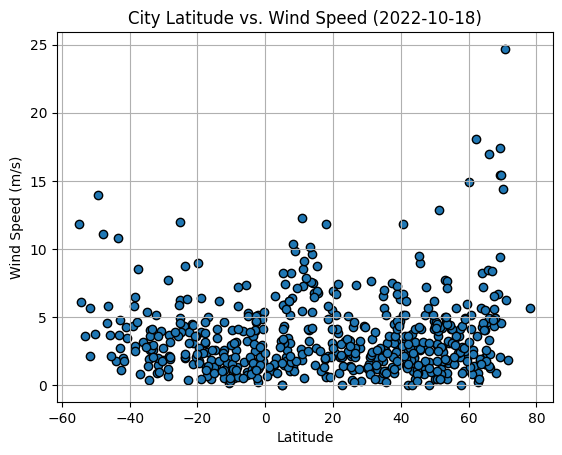

In [12]:
#keep above x_data the same, change y_data to wind speed
y_data = city_data_df['Wind Speed']

#plot the data as before
lat_vs_humid = plt.scatter(x_data, y_data, edgecolor = 'black')

#labels & grid
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2022-10-18)')

In [15]:
# Define a function to create Linear Regression plots
def regression_plot(x_values, y_values, x_label, y_label, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, edgecolor = 'black')
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,zilair,52.2332,57.4392,-9.24,95,100,4.21,RU,1706671143
2,ola,59.5833,151.2833,-21.37,82,14,1.99,RU,1706671143
3,crane,31.3974,-102.3501,14.92,38,38,3.37,US,1706671144
4,siwa oasis,29.2041,25.5195,8.88,74,44,4.35,EG,1706671144
5,ilulissat,69.2167,-51.1000,-22.99,45,21,2.06,GL,1706671144


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,codrington,-38.2667,141.9667,20.06,58,22,6.47,AU,1706671143
9,edinburgh of the seven seas,-37.0676,-12.3116,13.86,57,81,0.80,SH,1706671145
12,margaret river,-33.9500,115.0667,28.05,49,0,4.02,AU,1706671146
14,touros,-5.1989,-35.4608,27.16,72,13,5.32,BR,1706671077
15,kiunga,-6.1219,141.2906,30.85,63,97,1.69,PG,1706671147


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


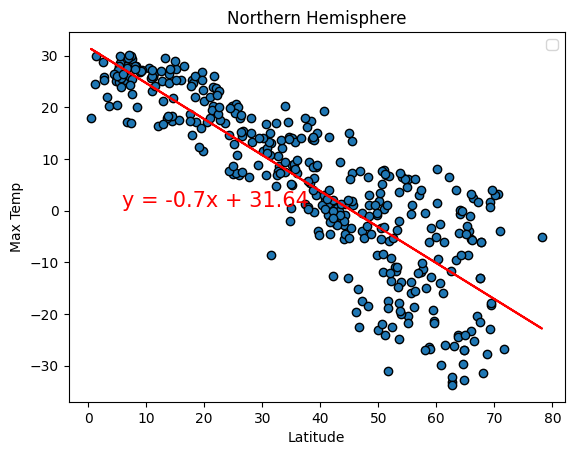

In [18]:
# northern hemispher latitude vs temp
regression_plot(northern_hemi_df['Lat'], 
        northern_hemi_df['Max Temp'],
        x_label = 'Latitude',
        y_label = 'Max Temp',
        title = 'Northern Hemisphere')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


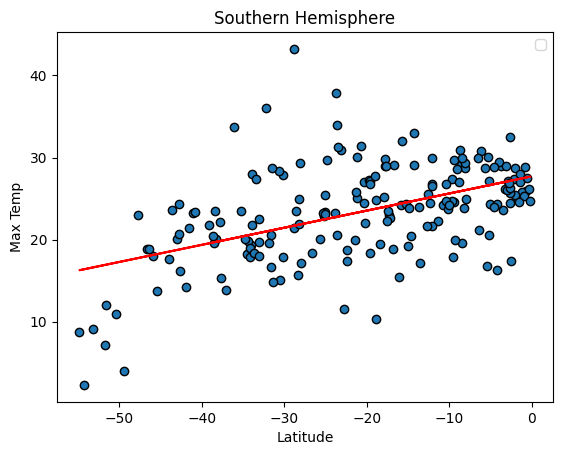

In [19]:
#southern hemisphere Latitude vs Temp
regression_plot(southern_hemi_df['Lat'], 
        southern_hemi_df['Max Temp'],
        x_label = 'Latitude',
        y_label = 'Max Temp',
        title = 'Southern Hemisphere')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


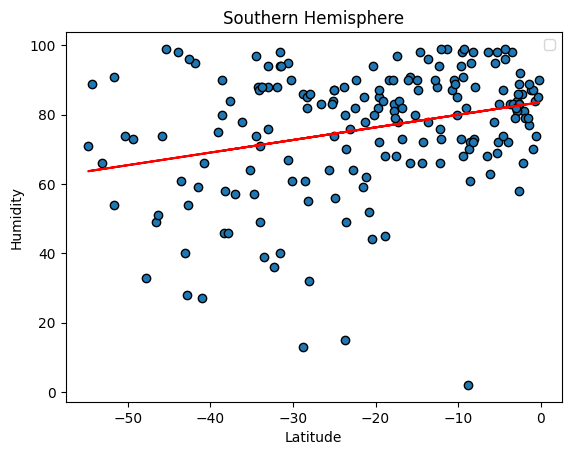

In [20]:
#northern hemisphere Latitude vs humidity
regression_plot(southern_hemi_df['Lat'], 
        southern_hemi_df['Humidity'],
        x_label = 'Latitude',
        y_label = 'Humidity',
        title = 'Southern Hemisphere')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


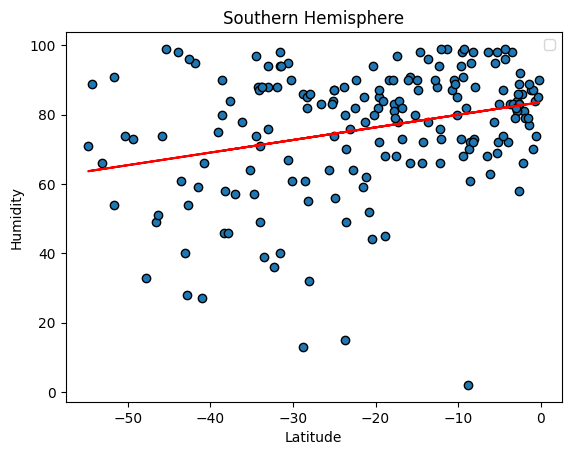

In [21]:
#southern hemisphere Latitude vs humidity
regression_plot(southern_hemi_df['Lat'], 
        southern_hemi_df['Humidity'],
        x_label = 'Latitude',
        y_label = 'Humidity',
        title = 'Southern Hemisphere')

## Cloudiness vs Latitude Linear Regression Plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


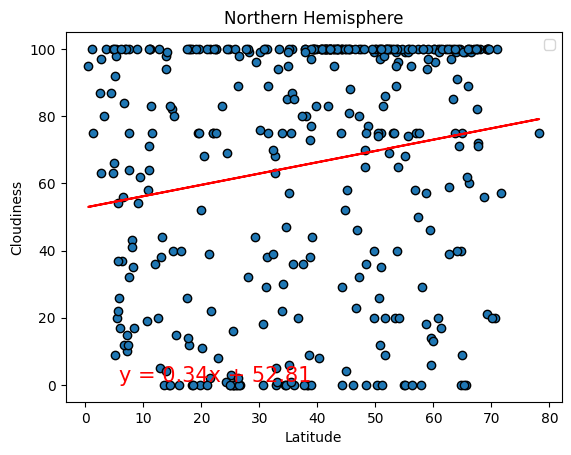

In [22]:
#northern hemisphere Latitude vs Cloudiness
regression_plot(northern_hemi_df['Lat'], 
        northern_hemi_df['Cloudiness'],
        x_label = 'Latitude',
        y_label = 'Cloudiness',
        title = 'Northern Hemisphere')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


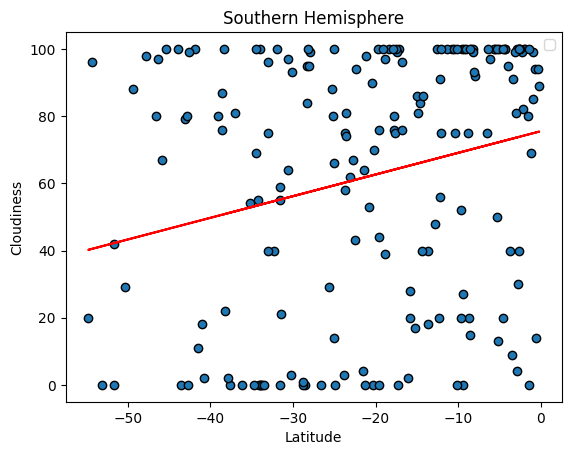

In [23]:
#southern hemisphere Latitude vs Temp
regression_plot(southern_hemi_df['Lat'], 
        southern_hemi_df['Cloudiness'],
        x_label = 'Latitude',
        y_label = 'Cloudiness',
        title = 'Southern Hemisphere')

## Wind Speed vs Latitude Linear regression

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


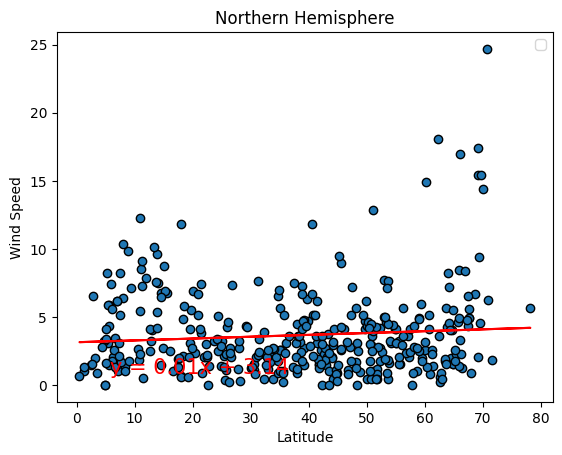

In [24]:
#northern hemisphere Latitude vs Temp
regression_plot(northern_hemi_df['Lat'], 
        northern_hemi_df['Wind Speed'],
        x_label = 'Latitude',
        y_label = 'Wind Speed',
        title = 'Northern Hemisphere')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


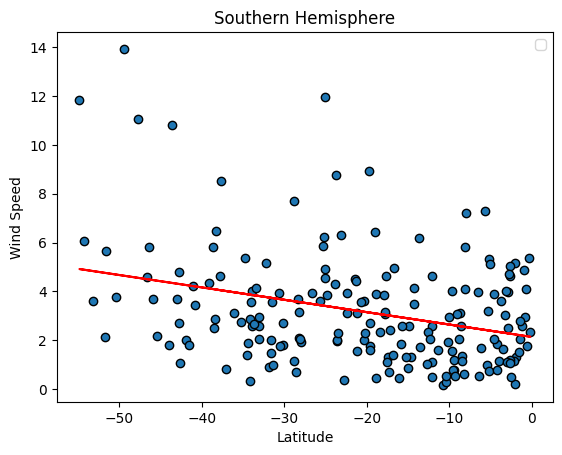

In [25]:
#southern hemisphere Latitude vs Temp
regression_plot(southern_hemi_df['Lat'], 
        southern_hemi_df['Wind Speed'],
        x_label = 'Latitude',
        y_label = 'Wind Speed',
        title = 'Southern Hemisphere')